# Data structures accepted by seaborn

As a data visualization library, seaborn requires that you provide it with data.  Seaborn supports several different dataset formats, and most functions accept data represented with objects from the `pandas` or `numpy` libraries as well as built-in Python types like lists and dictionaries. Understanding the usage patterns associated with these different options will help you quickly create useful visualizations for nearly any dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

## Long-form vs. wide-form data
----------------------------

Most plotting functions in seaborn are oriented towards *vectors* of data. When plotting ``x`` against ``y``, each variable should be a vector. Seaborn accepts data *sets* that have more than one vector organized in some tabular fashion. There is a fundamental distinction between "long-form" and "wide-form" data tables, and seaborn will treat each differently.

A long-form data table has the following characteristics:

- Each variable is a column
- Each observation is a row

We will use the "flights" dataset to demonstrate this, which records the number of airline passengers who flew in each month from 1949 to 1960. This dataset has three variables (*year*, *month*, and number of *passengers*):

In [15]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


With long-form data, columns in the table are given roles in the plot by explicitly assigning them to one of the variables. For example, making a monthly plot of the number of passengers per year looks like this:

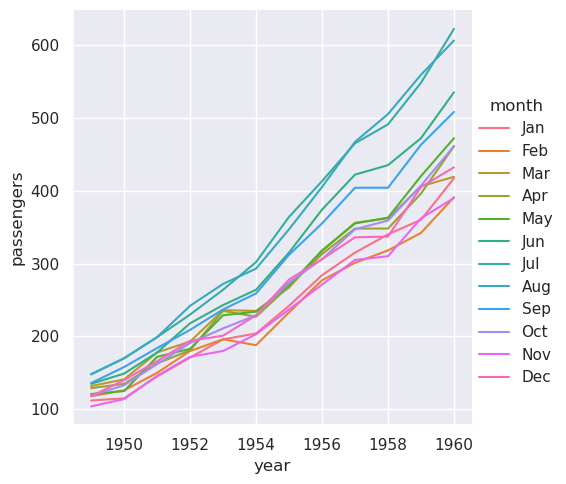

In [3]:
# Create a line plot showing the number of passengers over the years, differentiated by month
sns.relplot(data=flights, # specify the dataset
            x="year", y="passengers", # specify the x and y axis variables
            hue="month", # specify different months for color coding
            kind="line" # specify the type of plot as line plot
            )

The advantage of long-form data is that it lends itself well to this explicit specification of the plot. It can accommodate datasets of arbitrary complexity, so long as the variables and observations can be clearly defined. But this format takes some getting used to, because it is often not the model of the data that one has in their head.

**Wide-form data**

For simple datasets, it is often more intuitive to think about data the way it might be viewed in a spreadsheet, where the columns and rows contain *levels* of different variables. For example, we can convert the flights dataset into a wide-form organization by  "pivoting" it so that each column has each month's time series over years:

In [4]:
#make a wide form dataframe from the long form flights dataset
flights_wide = flights.pivot(index="year", #specify the new index, year
                             columns="month", #specify the new columns, month
                             values="passengers" #specify the values to fill in the dataframe, passengers
                             )

flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


We have the same three variables, but they are organized differently. The variables in this dataset are linked to the *dimensions* of the table, rather than to named fields. Each observation is defined by both the value at a cell in the table and the coordinates of that cell with respect to the row and column indices.

With long-form data, we can access variables in the dataset by their name. That is not the case with wide-form data. However, there is a clear association between the dimensions of the table and the variable in the dataset, seaborn is able to assign those variables roles in the plot.

Note, Seaborn treats the argument to ``data`` as wide form when neither ``x`` nor ``y`` are assigned.

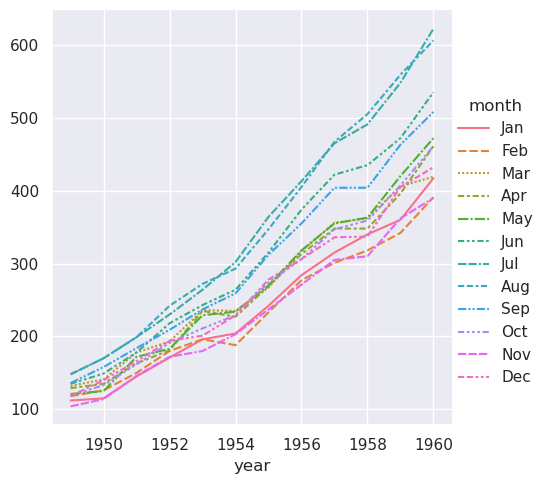

In [5]:
#make the same plot as above but using the wide form dataframe
sns.relplot(data=flights_wide, # specify the wide form dataframe
            kind="line" #by specifying kind as line, seaborn understands to plot all columns against the index
            )

This plot looks very  similar to the one before. Seaborn has assigned the index of the dataframe to ``x``, the values of the dataframe to ``y``, and it has drawn a separate line for each month. There is a notable difference between the two plots, however. When the dataset went through the "pivot" operation that converted it from long-form to wide-form, the information about what the values mean was lost. As a result, there is no y axis label. (The lines also have dashes here, because `relplot` has mapped the column variable to both the ``hue`` and ``style`` semantic so that the plot is more accessible. We didn't do that in the long-form case, but we could have by setting ``style="month"``).

Thus far, we did much less code while using wide-form data and made nearly the same plot. This seems easier! But a big advantage of long-form data is that, once you have the data in the correct format, you no longer need to think about its **structure**. You can design your plots by thinking only about the variables contained within it. For example, to draw lines that represent the monthly time series for each year, simply reassign the variables:

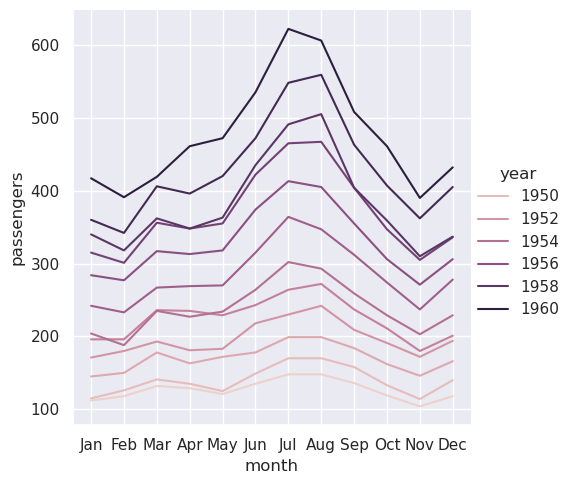

In [ ]:
# Create a line plot showing the number of passengers over the months, differentiated by year
sns.relplot(data=flights, # specify the dataset
            x="month", y="passengers", #explicitly specify the x and y axis variables
            hue="year", # specify different years for color coding
            kind="line" # specify the type of plot as line plot
            )

To achieve the same remapping with the wide-form dataset, we would need to transpose the table:

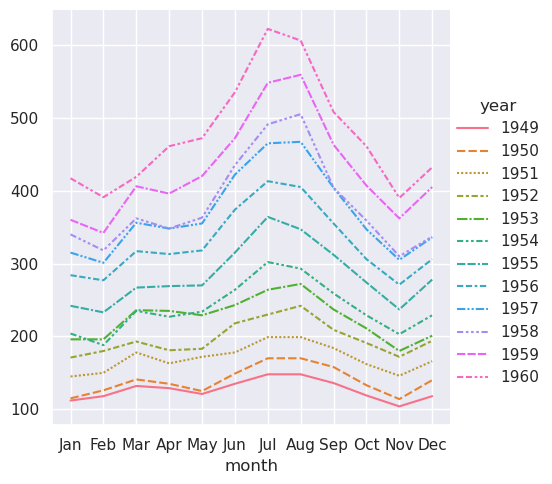

In [ ]:
sns.relplot(data=flights_wide.transpose(), # transpose the wide form dataframe to switch rows and columns, transpose is a pandas function
            kind="line"
            )

The absence of explicit variable assignments also means that each plot type needs to define a fixed mapping between the dimensions of the wide-form data and the roles in the plot. Because this natural mapping may vary across plot types, the results are less predictable when using wide-form data. For example, the `categorical` plots assign the **column** dimension of the table to ``x`` and then aggregate across the rows (ignoring the index):

We will do some data manipulation to demonstate. The **fights_wide** has 12 rows and 12 columns. The modified data has 12 rows and 10 columns.

In [35]:
flights_wide.transpose().head() #view of the transposed dataframe swaps the xaxis and y-axis/ rows and columns

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [36]:
#drop columns 1959 and 1960 to better see trends in earlier years
dropped = flights_wide.transpose().iloc[:, :-2]
dropped.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958
month,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340
Feb,118,126,150,180,196,188,233,277,301,318
Mar,132,141,178,193,236,235,267,317,356,362
Apr,129,135,163,181,235,227,269,313,348,348
May,121,125,172,183,229,234,270,318,355,363


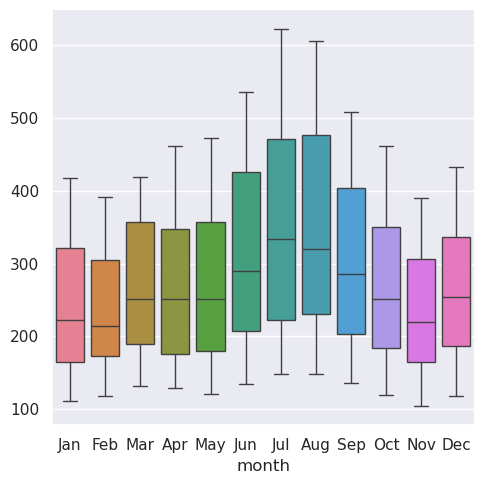

In [ ]:
#Using wide form dataframe to create boxplot, the columns are treated as different categories, matching the index values
sns.catplot(data=flights_wide, kind="box")

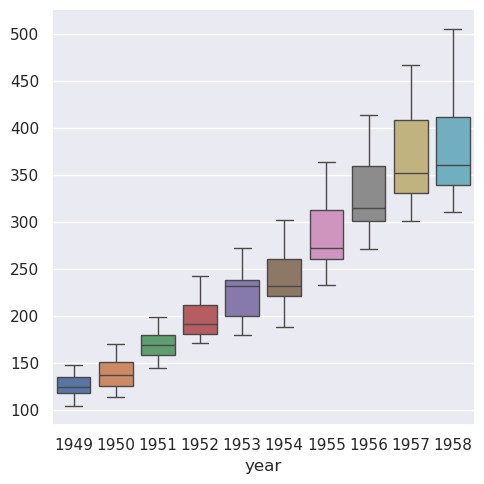

In [ ]:
#Using the modified dataframe without 1959 and 1960 to create boxplot, the columns are treated as different categories, no longer matching the index values
sns.catplot(data=dropped, kind="box")

In [10]:
#get the mean of each row (year) in the wide form dataframe
flights_wide.mean(axis=1)

year
1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
1960    476.166667
dtype: float64

In [11]:
#get the mean of each month across all years
flights_wide.mean(axis=0)

month
Jan    241.750000
Feb    235.000000
Mar    270.166667
Apr    267.083333
May    271.833333
Jun    311.666667
Jul    351.333333
Aug    351.083333
Sep    302.416667
Oct    266.583333
Nov    232.833333
Dec    261.833333
dtype: float64

When using pandas to represent wide-form data, you are limited to just a few variables (no more than three). This is because seaborn does not make use of multi-index information, which is how pandas represents additional variables in a tabular format. The `xarray` offers labeled N-dimensional array objects, which can be considered a generalization of wide-form data to higher dimensions. At present, seaborn does not directly support objects from ``xarray``, but they can be transformed into a long-form `pandas.DataFrame` using the ``to_pandas`` method and then plotted in seaborn like any other long-form data set.


## Messy data

Many datasets cannot be clearly interpreted using either long-form or wide-form rules. If datasets that are clearly long-form or wide-form are `"tidy"`, we might say that these more ambiguous datasets are "messy". In a messy dataset, the variables are neither uniquely defined by the keys nor by the dimensions of the table. This often occurs with *repeated-measures* data, where it is natural to organize a table such that each row corresponds to the *unit* of data collection. Consider this simple dataset from a psychology experiment in which twenty subjects performed a memory task where they studied anagrams while their attention was either divided or focused:

In [42]:
anagrams = sns.load_dataset("anagrams")
anagrams

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


The attention variable is *between-subjects*, but there is also a *within-subjects* variable: the number of possible solutions to the anagrams, which varied from 1 to 3. The dependent measure is a score of memory performance. These two variables (number and score) are jointly encoded across several columns. As a result, the whole dataset is neither clearly long-form nor clearly wide-form.

## Pandas Datamanipulation to process data into plot-ready formats

How might we tell seaborn to plot the average score as a function of attention and number of solutions? We'd first need to coerce the data into one of our two structures. Let's transform it to a tidy long-form table, such that each variable is a column and each row is an observation. We can use the method `pandas.DataFrame.melt` to accomplish this task:

In [43]:
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"], var_name="solutions", value_name="score")
anagrams_long

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0
5,6,divided,num1,5.0
6,7,divided,num1,5.0
7,8,divided,num1,5.0
8,9,divided,num1,2.0
9,10,divided,num1,6.0


Now we can make the plot that we want:

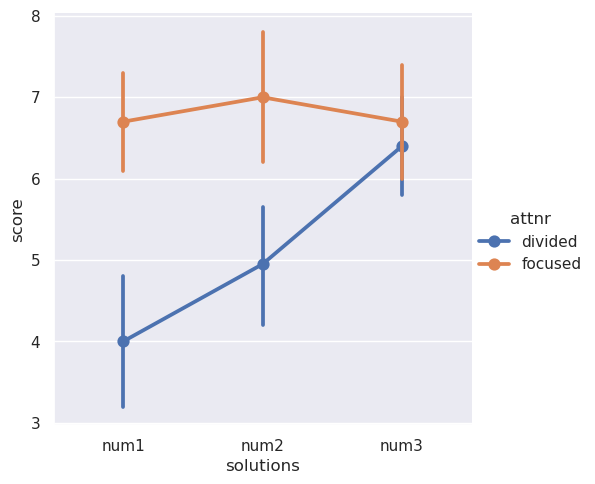

In [44]:
#The data now has a row for each subject (subidr) and attention rating (attnr) combination, with columns for the type of solution and the corresponding score.
#we can use this new dataframe to create a point plot showing the scores for different types of solutions, differentiated by attention rating
sns.catplot(data=anagrams_long, # specify the long form dataframe
            x="solutions", y="score", # specify the x and y axis variables
            hue="attnr", # specify different attention ratings for color coding
            kind="point" # specify the type of plot as point plot
            )

## Options for visualizing long-form data
--------------------------------------

While long-form data has a precise definition, seaborn is fairly flexible in terms of how it is actually organized across the data structures in memory. The examples in the rest of the documentation will typically use `pandas.DataFrame` objects and reference variables in them by assigning names of their columns to the variables in the plot. But it is also possible to store vectors in a Python dictionary or a class that implements that interface:

In [49]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights_dict = flights.to_dict() #convert the dataframe to a dictionary
flights_dict.keys() #view the keys of the dictionary, where each column is a key

dict_keys(['year', 'month', 'passengers'])

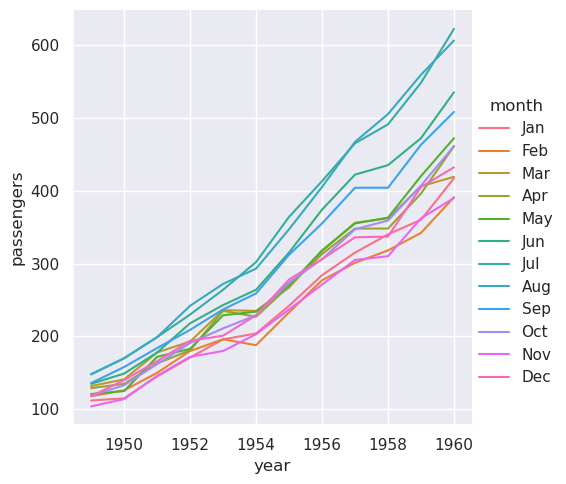

In [50]:
# Create a line plot using the dictionary data structure
sns.relplot(data=flights_dict, # specify the dictionary as the dataset
            x="year", y="passengers", # specify the x and y axis variables, using dict keys
            hue="month", # specify different months for color coding, using dict key
            kind="line" # specify the type of plot as line plot
            )

Many pandas operations, such as the split-apply-combine operations of a group-by, will produce a dataframe where information has moved from the columns of the input dataframe to the index of the output. So long as the name is retained, you can still reference the data as normal:

In [ ]:
#create a dataframe showing the average number of passengers per month for each year
flights_avg = flights.groupby("year").mean(numeric_only=True)
flights_avg

,passengers
year,
1949,126.666667
1950,139.666667
1951,170.166667
1952,197.000000
1953,225.000000
1954,238.916667
1955,284.000000
1956,328.250000
1957,368.416667


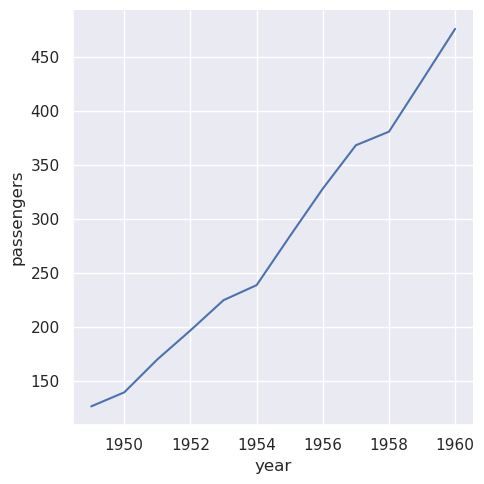

In [52]:
# Create a line plot showing the average number of passengers per year
sns.relplot(data=flights_avg,
            x="year", y="passengers", 
            kind="line"
            )

Additionally, it's possible to pass vectors of data directly as arguments to ``x``, ``y``, and other plotting variables. If these vectors are pandas objects, the ``name`` attribute will be used to label the plot:

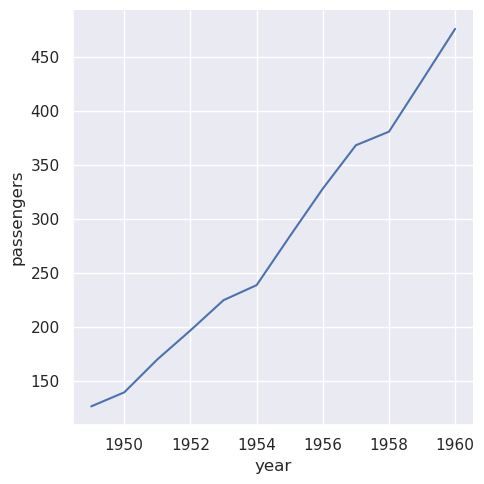

In [53]:
#create vectors for year and passengers from the flights_avg dataframe
year = flights_avg.index
passengers = flights_avg["passengers"]

# Create a line plot using the vectors
sns.relplot(x=year, y=passengers, # specify the x and y axis variables using the vectors
            kind="line" # specify the type of plot as line plot
            )

Numpy arrays and other objects that implement the Python sequence interface work too, but if they don't have names, the plot will not be as informative without further tweaking:

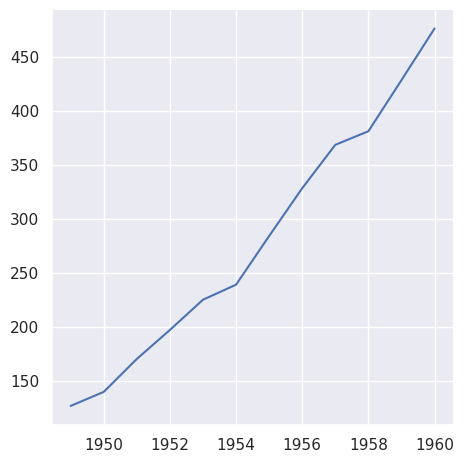

In [ ]:
#make the same plot as above but converting the vectors to numpy array and list
sns.relplot(x=year.to_numpy(),  #numpy array for x axis
            y=passengers.to_list(), #list for y axis
            kind="line" # specify the type of plot as line plot
            )

## Options for visualizing wide-form data

The options for passing wide-form data are even more flexible. As with long-form data, pandas objects are preferable because the name (and, in some cases, index) information can be used. But in essence, any format that can be viewed as a single vector or a collection of vectors can be passed to ``data``, and a valid plot can usually be constructed.

The example we saw above used a rectangular `pandas.DataFrame`, which can be thought of as a collection of its columns. A dict or list of pandas objects will also work, but we'll lose the axis labels:

In [ ]:
#take the flighte_wide dataframe and convert it to an array of its columns
flights_wide_list = [col for _, col in flights_wide.items()] #.items acts like enumerate for dataframes, returning index and column (_, col)
#.item retuns and iterable of (index, column) pairs (column name, column data), and attaches it to the list, where each element is a pandas Series
flights_wide_list

[year
 1949    112
 1950    115
 1951    145
 1952    171
 1953    196
 1954    204
 1955    242
 1956    284
 1957    315
 1958    340
 1959    360
 1960    417
 Name: Jan, dtype: int64,
 year
 1949    118
 1950    126
 1951    150
 1952    180
 1953    196
 1954    188
 1955    233
 1956    277
 1957    301
 1958    318
 1959    342
 1960    391
 Name: Feb, dtype: int64,
 year
 1949    132
 1950    141
 1951    178
 1952    193
 1953    236
 1954    235
 1955    267
 1956    317
 1957    356
 1958    362
 1959    406
 1960    419
 Name: Mar, dtype: int64,
 year
 1949    129
 1950    135
 1951    163
 1952    181
 1953    235
 1954    227
 1955    269
 1956    313
 1957    348
 1958    348
 1959    396
 1960    461
 Name: Apr, dtype: int64,
 year
 1949    121
 1950    125
 1951    172
 1952    183
 1953    229
 1954    234
 1955    270
 1956    318
 1957    355
 1958    363
 1959    420
 1960    472
 Name: May, dtype: int64,
 year
 1949    135
 1950    149
 1951    178
 1952    218
 1

In [59]:
flights_wide_list[0] #view the first column (January) as a list

year
1949    112
1950    115
1951    145
1952    171
1953    196
1954    204
1955    242
1956    284
1957    315
1958    340
1959    360
1960    417
Name: Jan, dtype: int64

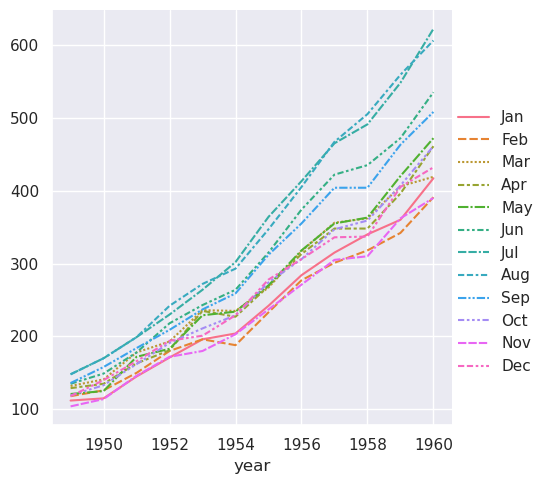

In [ ]:
# Create a line plot using the list
sns.relplot(data=flights_wide_list, # specify the list
            kind="line"
            )

The vectors in a collection do not need to have the same length. If they have an ``index``, it will be used to align them:

In [67]:
# Create two separate series from the wide form dataframe: January up to 1955 and August from 1952 onwards, not equal length series
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
two_series

[year
 1949    112
 1950    115
 1951    145
 1952    171
 1953    196
 1954    204
 1955    242
 Name: Jan, dtype: int64,
 year
 1952    242
 1953    272
 1954    293
 1955    347
 1956    405
 1957    467
 1958    505
 1959    559
 1960    606
 Name: Aug, dtype: int64]

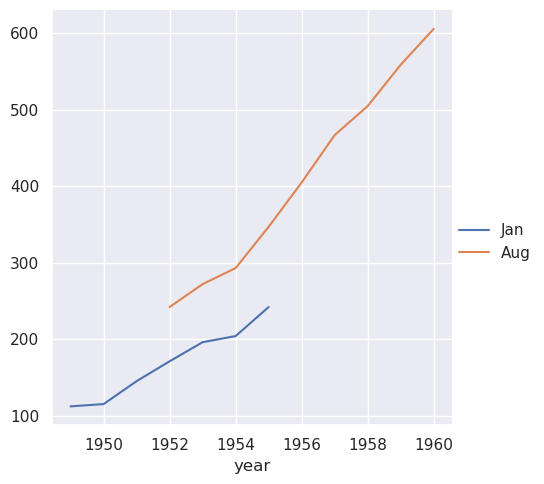

In [ ]:
# Create a line plot using the two series of different lengths
sns.relplot(data=two_series,
            kind="line",
            #dashes=False #by default, seaborn uses dashes to differentiate lines of different lengths
            )

Whereas an ordinal index will be used for numpy arrays or simple Python sequences:

In [ ]:
#take the  two series and convert them to numpy arrays
two_arrays = [s.to_numpy() for s in two_series]
two_arrays

[array([112, 115, 145, 171, 196, 204, 242]),
 array([242, 272, 293, 347, 405, 467, 505, 559, 606])]

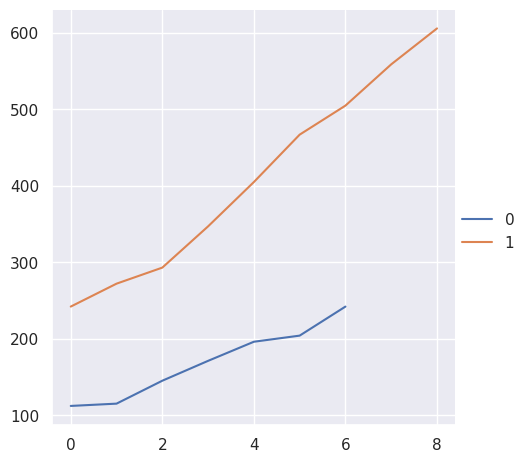

In [ ]:
sns.relplot(data=two_arrays, 
            kind="line",
            #dashes=False #by default, seaborn uses dashes to differentiate lines of different lengths
            ) #note that we lost the year and hue(month, now 0,1) information when converting to arrays. They share the same x-axis starting at 0

But a dictionary of such vectors will at least use the keys:

In [71]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
two_arrays_dict

{'Jan': array([112, 115, 145, 171, 196, 204, 242]),
 'Aug': array([242, 272, 293, 347, 405, 467, 505, 559, 606])}

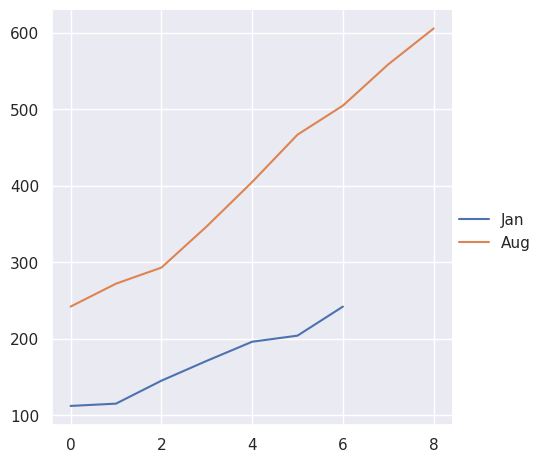

In [ ]:
sns.relplot(data=two_arrays_dict, 
            kind="line",
            #dashes=False #by default, seaborn uses dashes to differentiate lines of different lengths
            ) #the month names are preserved as keys in the dictionary, but the year information is still lost

Rectangular numpy arrays are treated just like a dataframe without index information, so they are viewed as a collection of column vectors. Note that this is different from how numpy indexing operations work, where a single indexer will access a row. But it is consistent with how pandas would turn the array into a dataframe or how matplotlib would plot it:

In [81]:
#convert the flights_wide to a numpy array
flights_array = flights_wide.to_numpy()
flights_array

array([[112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118],
       [115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140],
       [145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166],
       [171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194],
       [196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201],
       [204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229],
       [242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278],
       [284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306],
       [315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336],
       [340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337],
       [360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405],
       [417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]])

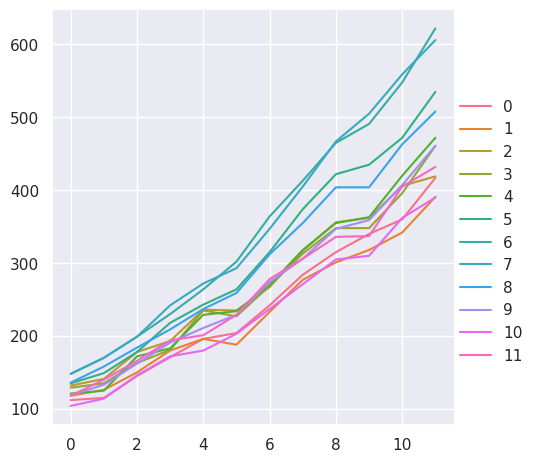

In [ ]:
#plot the numpy array
sns.relplot(data=flights_array, 
            kind="line",
            dashes=False #by default, seaborn uses dashes to differentiate lines of different lengths
            ) #not how we lost the month and year information when converting to a numpy array

Now that we have learned about data manipulation (using Pandas and Numpy), lets learn more about Seaborn plotting [.objects](./objects_interface.ipynb)